In [145]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
from wordcloud import WordCloud, STOPWORDS
from stopwords import get_stopwords

bibliography = pd.read_csv('data/bibliografia.csv', delimiter='|', encoding='ISO-8859-1')

## bibliografia.csv

In [155]:
bibliography = bibliography.drop('DataOraModifica', axis=1)

In [156]:
print(bibliography.head())

   IdBibliografia       Autore  \
0               1     Ricci L.   
1               2     Zampa R.   
2               3  Zambotti B.   
3               4   Zaghini F.   
4               5  Zaccaria G.   

                                              Titolo DescrizioneOpera  \
0  Alcuni cenni storici di Cusercoli: omaggio al ...              NaN   
1  Il castello e la chiesa di Polenta nella provi...              NaN   
2  Diario Ferrarese dell'anno 1476 sino al 1504: ...              NaN   
3       Fiumana, l'abbazia, il paese e la parrocchia              NaN   
4  Meldola un castello una città: notizie storich...              NaN   

        Sede       Annata LuogoPubblicazione       Anno CuratoreEdizione  \
0        NaN          NaN       Castelplanio       1904              NaN   
1        NaN          NaN             Milano       1891              NaN   
2  RR.II.SS.  XXIV/VII/II            Bologna  1934-1937         Pardi G.   
3        NaN          NaN              Forlì       1

In [157]:
print(bibliography.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   IdBibliografia      1154 non-null   int64 
 1   Autore              999 non-null    object
 2   Titolo              1154 non-null   object
 3   DescrizioneOpera    5 non-null      object
 4   Sede                503 non-null    object
 5   Annata              465 non-null    object
 6   LuogoPubblicazione  926 non-null    object
 7   Anno                1141 non-null   object
 8   CuratoreEdizione    342 non-null    object
 9   CasaEditrice        853 non-null    object
 10  ISBN                53 non-null     object
 11  Pagine              471 non-null    object
 12  EdizioniSuccessive  24 non-null     object
 13  VolPiuVol           153 non-null    object
dtypes: int64(1), object(13)
memory usage: 126.3+ KB
None


In [158]:
print(bibliography.isnull().sum())

IdBibliografia           0
Autore                 155
Titolo                   0
DescrizioneOpera      1149
Sede                   651
Annata                 689
LuogoPubblicazione     228
Anno                    13
CuratoreEdizione       812
CasaEditrice           301
ISBN                  1101
Pagine                 683
EdizioniSuccessive    1130
VolPiuVol             1001
dtype: int64


In [159]:
print(castles.duplicated().sum())

0


<Axes: >

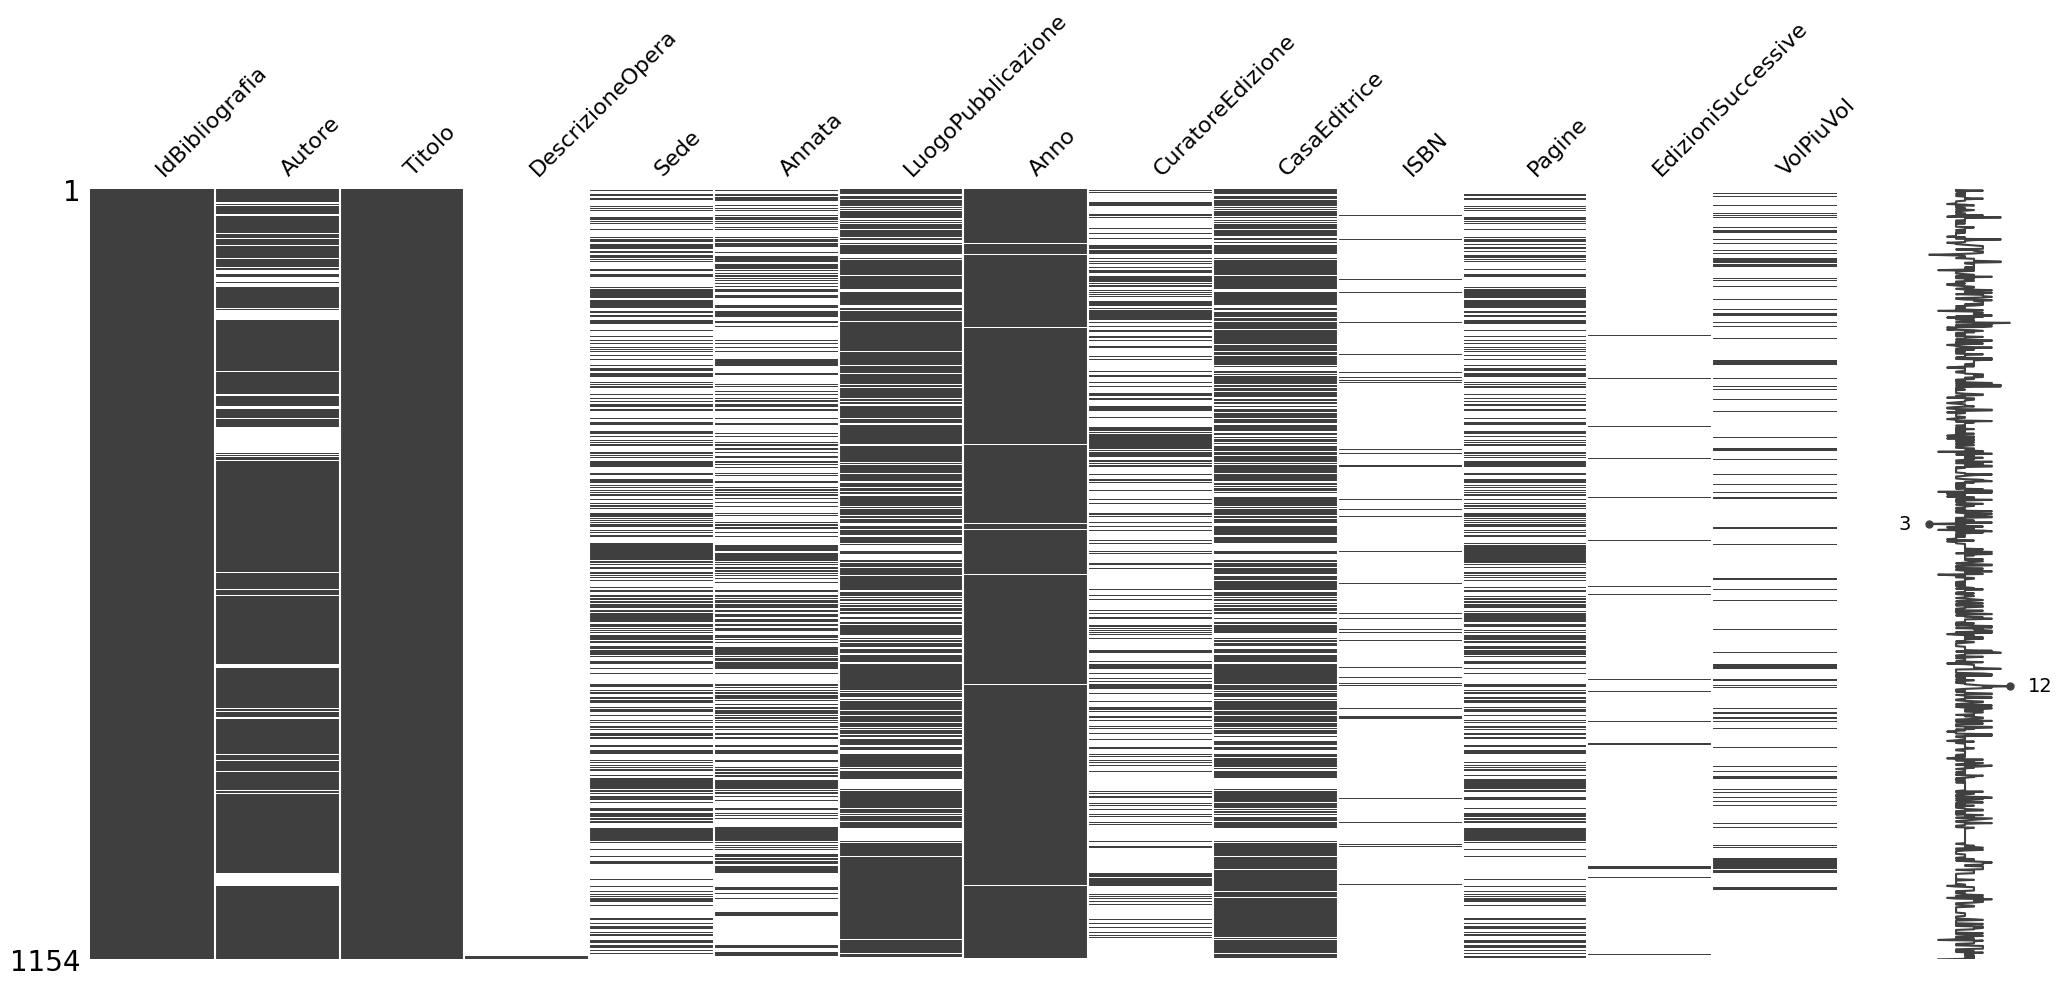

In [160]:
msno.matrix(bibliography)

Autore
Merlini F.        28
Foschi U.         20
Foschi P.         20
Benati A.         18
Tiraboschi G.     15
Tonini L.         13
Ricci C.          10
Poggiali C.        9
Andreolli B.       9
Balduzzi L.        9
Pasolini P. D.     9
Baldisserri L.     8
Affò I.            8
Pezzana A.         8
Artocchini C.      8
Calzolari M.       7
Marinelli L.       7
Fantuzzi M.        7
Gatta F. S.        6
Pini A. I.         6
Boselli G. V.      5
Bocchi F.          5
Torre A.           5
Micheli G.         5
Lazzari T.         5
Name: count, dtype: int64


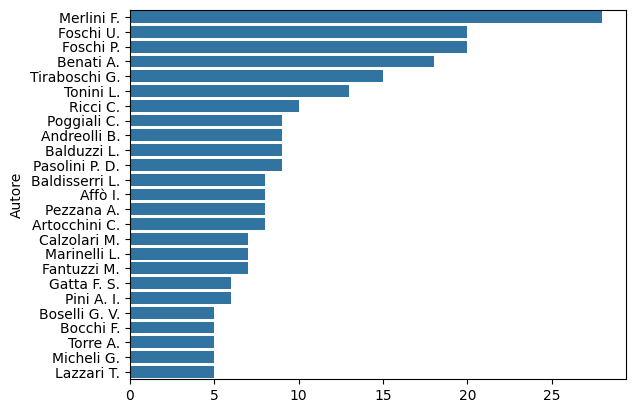

In [161]:
autore_counts = bibliography['Autore'].value_counts().head(25)
print(autore_counts)
sns.barplot(y=autore_counts.index, x=autore_counts.values)
plt.show()

LuogoPubblicazione
Bologna                       120
Parma                          70
Modena                         70
Reggio Emilia                  66
Piacenza                       47
Ravenna                        46
Imola                          45
Roma                           40
Rimini                         34
Firenze                        34
Milano                         32
Faenza                         29
Ferrara                        18
Forlì                          16
Cesena                         13
Venezia                        12
Città di Castello, Bologna     10
Città di Castello               9
s.l.                            9
Finale Emilia                   7
Casalecchio di Reno             7
Porretta Terme, Pistoia         7
Guastalla                       7
Verucchio                       7
Mirandola                       6
Name: count, dtype: int64


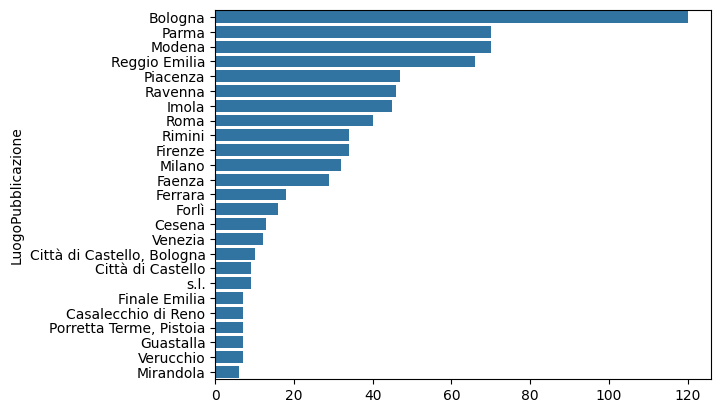

In [162]:
luogo_counts = bibliography['LuogoPubblicazione'].value_counts().head(25)
print(luogo_counts)
sns.barplot(y=luogo_counts.index, x=luogo_counts.values)
plt.show()

Anno
1987    40
2000    31
1997    31
1998    29
1988    27
1995    27
1985    26
1999    23
1971    22
1993    22
2001    21
1990    21
1984    19
1983    19
2002    19
2003    18
1994    18
1989    15
1972    15
1992    14
1978    11
1996    11
1960    11
1981    10
1973    10
Name: count, dtype: int64


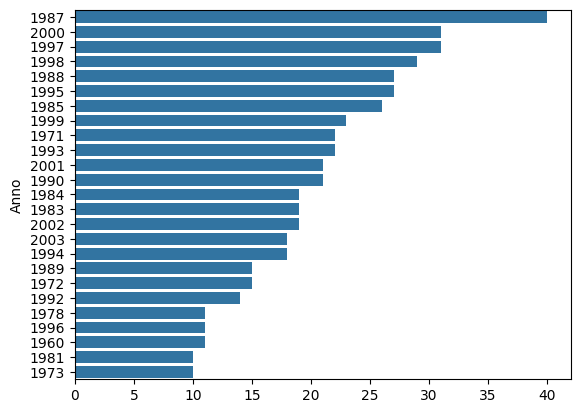

In [163]:
anno_counts = bibliography['Anno'].value_counts().head(25)
print(anno_counts)
sns.barplot(y=anno_counts.index, x=anno_counts.values)
plt.show()